In [2]:
from src.trainers import compile_and_fit_with_pinball_loss
from src.loaders.window_generator import WindowGenerator
from src.loaders.data_loader import load_basic_preprocessed_train, load_submission_data
from src.make_submissions.load_test_features import make_submission_df, to_submission_csv

In [3]:
from src.loaders.data_loader import load_train_data
from src.preprocessors.preprocessors import split_train_valid_test

train_df, valid_df, test_df = split_train_valid_test(load_train_data(), [0.7, 0.2, 0.1])


ratio should be 3 length list, example: [0.6, 0.3, 0.1]
sum of ration should be 1, example: [0.7, 0.2, 0.1]
shape of train, valid, test: (36792, 9), (10511, 9), (5257, 9)


In [4]:
train_df_target = train_df["TARGET"]
valid_df_target = valid_df["TARGET"]
test_df_target = test_df["TARGET"]

In [5]:
train_df, valid_df, test_df = load_basic_preprocessed_train()

ratio should be 3 length list, example: [0.6, 0.3, 0.1]
sum of ration should be 1, example: [0.7, 0.2, 0.1]
shape of train, valid, test: (36792, 17), (10511, 17), (5257, 17)


In [6]:
train_df["scaled_TARGET"] = train_df["TARGET"]
valid_df["scaled_TARGET"] = valid_df["TARGET"]
test_df["scaled_TARGET"] = test_df["TARGET"]

train_df["TARGET"] = train_df_target
valid_df["TARGET"] = valid_df_target
test_df["TARGET"] = test_df_target

In [7]:
train_df

,DHI,DNI,WS,RH,T,TARGET,Day_sin,Day_cos,Hour_sin,Hour_cos,GHI,DHI_min_max_scaled,DNI_min_max_scaled,GHI_min_max_scaled,WS_min_max_scaled,RH_min_max_scaled,T_min_max_scaled,scaled_TARGET
0,-0.614791,-0.665264,-0.652078,0.523656,-1.983543,0.000000,-0.020308,1.329597,-0.000584,1.414117,-0.755529,-0.614791,-0.665264,-0.755529,-0.652078,0.523656,-1.983543,-0.685276
1,-0.614791,-0.665264,-0.652078,0.522735,-1.983543,0.000000,-0.020308,1.329597,-0.000584,1.414117,-0.755529,-0.614791,-0.665264,-0.755529,-0.652078,0.522735,-1.983543,-0.685276
2,-0.614791,-0.665264,-0.580885,0.647993,-1.983543,0.000000,-0.020308,1.329597,0.365437,1.365930,-0.755529,-0.614791,-0.665264,-0.755529,-0.580885,0.647993,-1.983543,-0.685276
3,-0.614791,-0.665264,-0.580885,0.646611,-1.983543,0.000000,-0.020308,1.329597,0.365437,1.365930,-0.755529,-0.614791,-0.665264,-0.755529,-0.580885,0.646611,-1.983543,-0.685276
4,-0.614791,-0.665264,-0.580885,0.805485,-1.983543,0.000000,-0.020308,1.329597,0.706513,1.224651,-0.755529,-0.614791,-0.665264,-0.755529,-0.580885,0.805485,-1.983543,-0.685276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36787,-0.029736,1.862045,2.124474,-0.759309,-0.254832,37.912042,0.816634,1.070792,0.999403,-1.000063,1.656074,-0.029736,1.862045,1.656074,2.124474,-0.759309,-0.254832,0.804417
36788,-0.010234,1.996416,2.622830,-0.834371,-0.158792,44.949675,0.816634,1.070792,0.706513,-1.224805,1.781253,-0.010234,1.996416,1.781253,2.622830,-0.834371,-0.158792,1.080949
36789,0.067773,1.944955,2.622830,-0.834832,-0.158792,49.078664,0.816634,1.070792,0.706513,-1.224805,1.755706,0.067773,1.944955,1.755706,2.622830,-0.834832,-0.158792,1.243191
36790,0.028769,2.127928,2.622830,-0.902066,-0.062753,55.083861,0.816634,1.070792,0.365437,-1.366084,1.908986,0.028769,2.127928,1.908986,2.622830,-0.902066,-0.062753,1.479156


2020-12-30 최고 스코어

cutter = [
    "DHI", 
    "DNI", 
    "GHI", 
    "DHI_min_max_scaled", 
    "DNI_min_max_scaled", 
    "GHI_min_max_scaled", 
    "scaled_TARGET", 
    "TARGET",
]

from src.model.multiple_output.convolution import Convolution1D
from src.loaders.data_loader import load_test_features, load_basic_preprocessed_predict

one_days_window_label_columns = WindowGenerator(
    train_df,
    valid_df,
    test_df,
    input_width=ONE_DAY_STEPS,
    label_width=OUTPUT_STEPS,
    shift=OUTPUT_STEPS,
    label_columns=["TARGET"]
)
submission_df = load_submission_data()
_, predict_df = load_basic_preprocessed_predict()
predict_df["scaled_TARGET"] = predict_df["TARGET"]
predict_df = predict_df[cutter]
predict_df.drop("TARGET", axis=1, inplace=True)
predict_df = load_test_features(predict_df, 48)

for i in range(1, 10):
    q = i/10
    conv1 = Convolution1D(ONE_DAY_STEPS, OUTPUT_STEPS, 7)

    compile_and_fit_with_pinball_loss(conv1, one_days_window_label_columns, q)
    conv1.evaluate(one_days_window_label_columns.test, verbose=0)
    predict_np = predict_df.reshape(-1, 48, 7)
    pred_y = conv1.predict(predict_np)[:, :, -1]
    submission_df[f"q_{q}"] = pred_y.reshape(-1)

to_submission_csv(submission_df, "conv1d_not_scaled_target.csv")

In [8]:
cutter = [
    "DHI",
    "DNI",
#     "WS",
#     "RH",
#     "T",
#     "Day_sin",
#     "Day_cos",
#     "Hour_sin",
#     "Hour_cos",
    "GHI",
    "DHI_min_max_scaled",
    "DNI_min_max_scaled",
    "GHI_min_max_scaled",
#     "WS_min_max_scaled",
#     "RH_min_max_scaled",
#     "T_min_max_scaled",
    "scaled_TARGET",
    "TARGET",
]
train_df = train_df[cutter]
valid_df = valid_df[cutter]
test_df = test_df[cutter]

In [10]:
train_df

,DHI,DNI,GHI,DHI_min_max_scaled,DNI_min_max_scaled,GHI_min_max_scaled,scaled_TARGET,TARGET
0,-0.614791,-0.665264,-0.755529,-0.614791,-0.665264,-0.755529,-0.685276,0.000000
1,-0.614791,-0.665264,-0.755529,-0.614791,-0.665264,-0.755529,-0.685276,0.000000
2,-0.614791,-0.665264,-0.755529,-0.614791,-0.665264,-0.755529,-0.685276,0.000000
3,-0.614791,-0.665264,-0.755529,-0.614791,-0.665264,-0.755529,-0.685276,0.000000
4,-0.614791,-0.665264,-0.755529,-0.614791,-0.665264,-0.755529,-0.685276,0.000000
...,...,...,...,...,...,...,...,...
36787,-0.029736,1.862045,1.656074,-0.029736,1.862045,1.656074,0.804417,37.912042
36788,-0.010234,1.996416,1.781253,-0.010234,1.996416,1.781253,1.080949,44.949675
36789,0.067773,1.944955,1.755706,0.067773,1.944955,1.755706,1.243191,49.078664
36790,0.028769,2.127928,1.908986,0.028769,2.127928,1.908986,1.479156,55.083861


In [11]:
TAU = 0.5
ONE_DAY_STEPS = 48
OUTPUT_STEPS = ONE_DAY_STEPS * 2

In [14]:
from src.model.multiple_output.convolution import Convolution1D
from src.loaders.data_loader import load_test_features, load_basic_preprocessed_predict

one_days_window_label_columns = WindowGenerator(
    train_df,
    valid_df,
    test_df,
    input_width=ONE_DAY_STEPS,
    label_width=OUTPUT_STEPS,
    shift=OUTPUT_STEPS,
    label_columns=["TARGET"]
)
submission_df = load_submission_data()
_, predict_df = load_basic_preprocessed_predict()
predict_df["scaled_TARGET"] = predict_df["TARGET"]
predict_df = predict_df[cutter]
predict_df.drop("TARGET", axis=1, inplace=True)
predict_df = load_test_features(predict_df, 48)

for i in range(1, 10):
    q = i/10
    conv1 = Convolution1D(ONE_DAY_STEPS, OUTPUT_STEPS, 17)

    compile_and_fit_with_pinball_loss(conv1, one_days_window_label_columns, q)
    conv1.evaluate(one_days_window_label_columns.test, verbose=0)
    predict_np = predict_df.reshape(-1, 48, 17)
    pred_y = conv1.predict(predict_np)[:, :, -1]
    submission_df[f"q_{q}"] = pred_y.reshape(-1)

to_submission_csv(submission_df, "conv1d_all_feature_target.csv")

ratio should be 3 length list, example: [0.6, 0.3, 0.1]
sum of ration should be 1, example: [0.7, 0.2, 0.1]
shape of train, valid, test: (36792, 17), (10511, 17), (5257, 17)
Epoch 1/1000
1146/1146 [==============================] - 13s 6ms/step - loss: 1.4835 - mean_absolute_error: 12.9946 - mean_squared_error: 529.6346 - _pinball_loss: 1.4835 - val_loss: 1.7758 - val_mean_absolute_error: 14.5262 - val_mean_squared_error: 583.4628 - val__pinball_loss: 1.7758
Epoch 2/1000
1146/1146 [==============================] - 6s 5ms/step - loss: 1.3941 - mean_absolute_error: 11.6825 - mean_squared_error: 433.6613 - _pinball_loss: 1.3941 - val_loss: 1.7648 - val_mean_absolute_error: 14.4343 - val_mean_squared_error: 580.5062 - val__pinball_loss: 1.7648
Epoch 3/1000
1146/1146 [==============================] - 5s 5ms/step - loss: 1.3808 - mean_absolute_error: 11.5381 - mean_squared_error: 427.0672 - _pinball_loss: 1.3808 - val_loss: 1.7593 - val_mean_absolute_error: 14.4524 - val_mean_squared_error

Epoch 7/1000
1146/1146 [==============================] - 6s 5ms/step - loss: 2.1853 - mean_absolute_error: 8.1213 - mean_squared_error: 220.5482 - _pinball_loss: 2.1853 - val_loss: 2.8186 - val_mean_absolute_error: 10.6461 - val_mean_squared_error: 327.1314 - val__pinball_loss: 2.8186
Epoch 8/1000
1146/1146 [==============================] - 6s 5ms/step - loss: 2.1786 - mean_absolute_error: 8.0854 - mean_squared_error: 219.5327 - _pinball_loss: 2.1786 - val_loss: 2.8273 - val_mean_absolute_error: 10.5970 - val_mean_squared_error: 329.8870 - val__pinball_loss: 2.8273
Epoch 9/1000
1146/1146 [==============================] - 6s 5ms/step - loss: 2.1686 - mean_absolute_error: 8.0463 - mean_squared_error: 218.3473 - _pinball_loss: 2.1686 - val_loss: 2.8136 - val_mean_absolute_error: 10.5580 - val_mean_squared_error: 323.1363 - val__pinball_loss: 2.8136
Epoch 10/1000
1146/1146 [==============================] - 6s 5ms/step - loss: 2.1633 - mean_absolute_error: 8.0244 - mean_squared_error: 2

Epoch 1/1000
1146/1146 [==============================] - 6s 5ms/step - loss: 3.6073 - mean_absolute_error: 7.2146 - mean_squared_error: 198.5323 - _pinball_loss: 3.6073 - val_loss: 3.5783 - val_mean_absolute_error: 7.1565 - val_mean_squared_error: 194.8312 - val__pinball_loss: 3.5783
Epoch 2/1000
1146/1146 [==============================] - 6s 5ms/step - loss: 2.7950 - mean_absolute_error: 5.5900 - mean_squared_error: 134.5321 - _pinball_loss: 2.7950 - val_loss: 3.5734 - val_mean_absolute_error: 7.1469 - val_mean_squared_error: 185.7621 - val__pinball_loss: 3.5734
Epoch 3/1000
1146/1146 [==============================] - 6s 5ms/step - loss: 2.7590 - mean_absolute_error: 5.5179 - mean_squared_error: 132.6568 - _pinball_loss: 2.7590 - val_loss: 3.5706 - val_mean_absolute_error: 7.1412 - val_mean_squared_error: 184.5065 - val__pinball_loss: 3.5706
Epoch 4/1000
1146/1146 [==============================] - 6s 5ms/step - loss: 2.7412 - mean_absolute_error: 5.4823 - mean_squared_error: 131.5

1146/1146 [==============================] - 6s 5ms/step - loss: 2.3851 - mean_absolute_error: 5.4660 - mean_squared_error: 151.2200 - _pinball_loss: 2.3851 - val_loss: 3.0739 - val_mean_absolute_error: 7.0929 - val_mean_squared_error: 230.5540 - val__pinball_loss: 3.0739
Epoch 9/1000
1146/1146 [==============================] - 6s 5ms/step - loss: 2.3716 - mean_absolute_error: 5.4399 - mean_squared_error: 150.7613 - _pinball_loss: 2.3717 - val_loss: 3.0872 - val_mean_absolute_error: 7.0434 - val_mean_squared_error: 224.3616 - val__pinball_loss: 3.0872
Epoch 10/1000
1146/1146 [==============================] - 6s 5ms/step - loss: 2.3575 - mean_absolute_error: 5.4131 - mean_squared_error: 150.4212 - _pinball_loss: 2.3575 - val_loss: 3.0794 - val_mean_absolute_error: 7.0839 - val_mean_squared_error: 227.5945 - val__pinball_loss: 3.0794
Epoch 11/1000
1146/1146 [==============================] - 6s 5ms/step - loss: 2.3511 - mean_absolute_error: 5.4053 - mean_squared_error: 150.6314 - _pinb

1146/1146 [==============================] - 6s 5ms/step - loss: 1.8964 - mean_absolute_error: 5.6981 - mean_squared_error: 176.9997 - _pinball_loss: 1.8964 - val_loss: 2.4945 - val_mean_absolute_error: 7.4648 - val_mean_squared_error: 264.6307 - val__pinball_loss: 2.4945
Epoch 16/1000
1146/1146 [==============================] - 6s 5ms/step - loss: 1.8906 - mean_absolute_error: 5.6853 - mean_squared_error: 177.0274 - _pinball_loss: 1.8906 - val_loss: 2.4748 - val_mean_absolute_error: 7.4264 - val_mean_squared_error: 267.4809 - val__pinball_loss: 2.4748
Epoch 17/1000
1146/1146 [==============================] - 6s 5ms/step - loss: 1.8845 - mean_absolute_error: 5.6681 - mean_squared_error: 176.3569 - _pinball_loss: 1.8845 - val_loss: 2.4955 - val_mean_absolute_error: 7.3459 - val_mean_squared_error: 258.9364 - val__pinball_loss: 2.4955
Epoch 18/1000
1146/1146 [==============================] - 6s 5ms/step - loss: 1.8818 - mean_absolute_error: 5.6625 - mean_squared_error: 176.3497 - _pin

1146/1146 [==============================] - 5s 5ms/step - loss: 1.3252 - mean_absolute_error: 6.0481 - mean_squared_error: 200.5663 - _pinball_loss: 1.3252 - val_loss: 1.7390 - val_mean_absolute_error: 7.8449 - val_mean_squared_error: 298.5801 - val__pinball_loss: 1.7390
Epoch 24/1000
1146/1146 [==============================] - 5s 5ms/step - loss: 1.3247 - mean_absolute_error: 6.0518 - mean_squared_error: 200.6709 - _pinball_loss: 1.3247 - val_loss: 1.7553 - val_mean_absolute_error: 7.7282 - val_mean_squared_error: 288.6918 - val__pinball_loss: 1.7553
Epoch 25/1000
1146/1146 [==============================] - 5s 5ms/step - loss: 1.3218 - mean_absolute_error: 6.0315 - mean_squared_error: 199.8844 - _pinball_loss: 1.3218 - val_loss: 1.7596 - val_mean_absolute_error: 7.8178 - val_mean_squared_error: 293.0010 - val__pinball_loss: 1.7596
Epoch 26/1000
1146/1146 [==============================] - 6s 5ms/step - loss: 1.3208 - mean_absolute_error: 6.0316 - mean_squared_error: 199.6789 - _pin

1146/1146 [==============================] - 5s 5ms/step - loss: 0.7573 - mean_absolute_error: 6.9840 - mean_squared_error: 233.8164 - _pinball_loss: 0.7573 - val_loss: 0.9557 - val_mean_absolute_error: 8.7305 - val_mean_squared_error: 332.9134 - val__pinball_loss: 0.9557
Epoch 15/1000
1146/1146 [==============================] - 5s 5ms/step - loss: 0.7515 - mean_absolute_error: 6.9400 - mean_squared_error: 232.9355 - _pinball_loss: 0.7515 - val_loss: 0.9563 - val_mean_absolute_error: 8.4725 - val_mean_squared_error: 322.9408 - val__pinball_loss: 0.9563
Epoch 16/1000
1146/1146 [==============================] - 5s 5ms/step - loss: 0.7469 - mean_absolute_error: 6.9028 - mean_squared_error: 232.0845 - _pinball_loss: 0.7469 - val_loss: 0.9488 - val_mean_absolute_error: 8.4594 - val_mean_squared_error: 322.8417 - val__pinball_loss: 0.9488
Epoch 17/1000
1146/1146 [==============================] - 6s 5ms/step - loss: 0.7427 - mean_absolute_error: 6.8700 - mean_squared_error: 231.5356 - _pin

In [36]:
submission_df = pd.read_csv("data/submission/conv1d_all_feature_target.csv_2020-12-30 12_03_55.958013.csv")

In [37]:
import pandas as pd

submission_df_1 = pd.read_csv('raw_target_predict_using_solar_values.csv')
submission_df_1

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.csv_Day7_0h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.csv_Day7_1h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.csv_Day7_1h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.csv_Day7_2h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
7771,80.csv_Day8_21h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.526921
7772,80.csv_Day8_22h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.746142
7773,80.csv_Day8_22h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.086555
7774,80.csv_Day8_23h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.272306


In [38]:
for i in range(1, 10):
    q = i/10
    submission_df[f"q_{q}"][submission_df[f"q_{q}"] < 1] = 0
submission_df

C:\Users\bees1\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bees1\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bees1\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.csv_Day7_0h30m,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.csv_Day7_1h00m,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.csv_Day7_1h30m,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.csv_Day7_2h00m,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7771,80.csv_Day8_21h30m,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7772,80.csv_Day8_22h00m,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7773,80.csv_Day8_22h30m,0.000000,0.0,0.000000,1.825519,0.0,0.0,0.0,0.0,0.0
7774,80.csv_Day8_23h00m,0.000000,0.0,0.000000,1.325230,0.0,0.0,0.0,0.0,0.0


In [39]:
(submission_df_1["q_0.1"] - submission_df["q_0.1"]).mean()

1.0996207571759258

In [41]:
s = 0
for i in range(1, 10):
    q = i/10
    s += (submission_df[f"q_{q}"] - submission_df_1[f"q_{q}"]).mean() * q

s/10

-3.470885324095422

In [42]:
submission_df.to_csv("raw_target_predict_using_all.csv", index=False)

In [18]:
conv1.predict(predict_np)[0]

array([[ 4.9281770e-01,  4.9281770e-01,  4.9281770e-01,  4.9281770e-01,
         4.9281770e-01,  4.9281770e-01,  4.9281770e-01],
       [ 7.6189011e-02,  7.6189011e-02,  7.6189011e-02,  7.6189011e-02,
         7.6189011e-02,  7.6189011e-02,  7.6189011e-02],
       [-5.2533066e-01, -5.2533066e-01, -5.2533066e-01, -5.2533066e-01,
        -5.2533066e-01, -5.2533066e-01, -5.2533066e-01],
       [-8.5956240e-01, -8.5956240e-01, -8.5956240e-01, -8.5956240e-01,
        -8.5956240e-01, -8.5956240e-01, -8.5956240e-01],
       [-7.0838153e-02, -7.0838153e-02, -7.0838153e-02, -7.0838153e-02,
        -7.0838153e-02, -7.0838153e-02, -7.0838153e-02],
       [-4.2691615e-01, -4.2691615e-01, -4.2691615e-01, -4.2691615e-01,
        -4.2691615e-01, -4.2691615e-01, -4.2691615e-01],
       [-7.6162839e-01, -7.6162839e-01, -7.6162839e-01, -7.6162839e-01,
        -7.6162839e-01, -7.6162839e-01, -7.6162839e-01],
       [-6.0606575e-01, -6.0606575e-01, -6.0606575e-01, -6.0606575e-01,
        -6.0606575e-01, -

In [33]:
import src.model.multiple_output.convolution
import importlib
importlib.reload(src.model.multiple_output.convolution)
from src.model.multiple_output.convolution import Convolution1D2
from src.loaders.data_loader import load_test_features, load_basic_preprocessed_predict

one_days_window_label_columns = WindowGenerator(
    train_df,
    valid_df,
    test_df,
    input_width=ONE_DAY_STEPS,
    label_width=OUTPUT_STEPS,
    shift=OUTPUT_STEPS,
    label_columns=["TARGET"]
)
submission_df = load_submission_data()
_, predict_df = load_basic_preprocessed_predict()
predict_df["scaled_TARGET"] = predict_df["TARGET"]
predict_df = predict_df[cutter]
predict_df.drop("TARGET", axis=1, inplace=True)
predict_df = load_test_features(predict_df, 48)

for i in range(1, 10):
    q = i/10
    print(q)
    
    conv1d2 = Convolution1D2(48, OUTPUT_STEPS, 7)

    compile_and_fit_with_pinball_loss(conv1d2, one_days_window_label_columns, q)
    conv1d2.evaluate(one_days_window_label_columns.test, verbose=0)
    predict_np = predict_df.reshape(-1, 48, 7)
    pred_y = conv1d2.predict(predict_np)[:, :, -1]
    submission_df[f"q_{q}"] = pred_y.reshape(-1)

to_submission_csv(submission_df, "conv1d2_not_scaled_target.csv")

ratio should be 3 length list, example: [0.6, 0.3, 0.1]
sum of ration should be 1, example: [0.7, 0.2, 0.1]
shape of train, valid, test: (36792, 17), (10511, 17), (5257, 17)
0.1
Epoch 1/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 1.4926 - mean_absolute_error: 13.0646 - mean_squared_error: 527.6806 - _pinball_loss: 1.4926 - val_loss: 1.7958 - val_mean_absolute_error: 15.5729 - val_mean_squared_error: 670.6212 - val__pinball_loss: 1.7958
Epoch 2/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 1.4189 - mean_absolute_error: 12.0127 - mean_squared_error: 453.3780 - _pinball_loss: 1.4189 - val_loss: 1.7774 - val_mean_absolute_error: 15.3909 - val_mean_squared_error: 663.2848 - val__pinball_loss: 1.7774
Epoch 3/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 1.4045 - mean_absolute_error: 11.8375 - mean_squared_error: 446.4313 - _pinball_loss: 1.4045 - val_loss: 1.7720 - val_mean_absolute_error: 15.2155 - val_mean_squared_er

KeyboardInterrupt: 

In [ ]:
import src.model.multiple_output.convolution
import importlib
importlib.reload(src.model.multiple_output.convolution)

from src.model.multiple_output.convolution import Convolution2D3
from src.loaders.data_loader import load_test_features, load_basic_preprocessed_predict

one_days_window_label_columns = WindowGenerator(
    train_df,
    valid_df,
    test_df,
    input_width=ONE_DAY_STEPS * 1,
    label_width=OUTPUT_STEPS,
    shift=OUTPUT_STEPS,
    label_columns=["TARGET"]
)
submission_df = load_submission_data()
_, predict_df = load_basic_preprocessed_predict()
predict_df["scaled_TARGET"] = predict_df["TARGET"]
predict_df = predict_df[cutter]
predict_df.drop("TARGET", axis=1, inplace=True)
predict_df = load_test_features(predict_df, 48 * 1)

for i in range(1, 10):
    q = i/10
    print(q)
    
    conv2d3 = Convolution2D3(1, OUTPUT_STEPS, 17)

    compile_and_fit_with_pinball_loss(conv2d3, one_days_window_label_columns, q)
    conv2d3.evaluate(one_days_window_label_columns.test, verbose=0)
    predict_np = predict_df.reshape(-1, 48, 17)
    pred_y = conv2d3.predict(predict_np)[:, :, -1]
    submission_df[f"q_{q}"] = pred_y.reshape(-1)

to_submission_csv(submission_df, "conv2d3_all_target.csv")

In [35]:
submission_df[15:50]

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
15,0.csv_Day7_7h30m,0.400381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.csv_Day7_8h00m,1.772600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.csv_Day7_8h30m,2.818873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.csv_Day7_9h00m,4.652788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.csv_Day7_9h30m,6.097359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.csv_Day7_10h00m,8.452878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.csv_Day7_10h30m,9.241078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.csv_Day7_11h00m,10.465257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.csv_Day7_11h30m,10.956903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.csv_Day7_12h00m,11.866484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:


train_df, predict_df = load_basic_preprocessed_predict()
predict_df["scaled_TARGET"] = predict_df["TARGET"]
predict_df = predict_df[cutter]
predict_df.drop("TARGET", axis=1, inplace=True)

NameError: name 'load_basic_preprocessed_predict' is not defined

In [20]:
one_days_window_label_columns = WindowGenerator(
    train_df,
    valid_df,
    test_df,
    input_width=ONE_DAY_STEPS,
    label_width=OUTPUT_STEPS,
    shift=OUTPUT_STEPS,
    label_columns=["ORIGIN_TARGET"]
)

In [15]:
for i in range(1, 10):
    q = i/10
    submission_df[f"q_{q}"][submission_df[f"q_{q}"] < 0] = 0
submission_df.to_csv("conv1_using_target_zero.csv", index=False)

C:\Users\bees1\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bees1\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bees1\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

In [21]:
one_days_window_label_columns.plot(conv1)

NameError: name 'conv1' is not defined

Epoch 1/1000
1146/1146 [==============================] - 8s 6ms/step - loss: 0.1519 - mean_absolute_error: 0.3038 - mean_squared_error: 0.2822 - _pinball_loss: 0.1519 - val_loss: 0.1501 - val_mean_absolute_error: 0.3001 - val_mean_squared_error: 0.2983 - val__pinball_loss: 0.1501
Epoch 2/1000
1146/1146 [==============================] - 6s 6ms/step - loss: 0.1164 - mean_absolute_error: 0.2327 - mean_squared_error: 0.2101 - _pinball_loss: 0.1164 - val_loss: 0.1439 - val_mean_absolute_error: 0.2878 - val_mean_squared_error: 0.2879 - val__pinball_loss: 0.1439
Epoch 3/1000
1146/1146 [==============================] - 6s 6ms/step - loss: 0.1129 - mean_absolute_error: 0.2258 - mean_squared_error: 0.2065 - _pinball_loss: 0.1129 - val_loss: 0.1421 - val_mean_absolute_error: 0.2843 - val_mean_squared_error: 0.2962 - val__pinball_loss: 0.1421
Epoch 4/1000
1146/1146 [==============================] - 6s 6ms/step - loss: 0.1108 - mean_absolute_error: 0.2217 - mean_squared_error: 0.2051 - _pinball

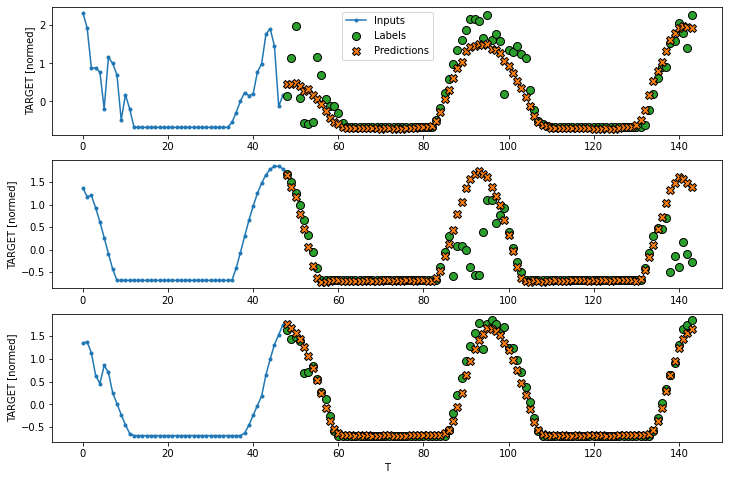

In [31]:
from src.model.multiple_output.convolution import Convolution2D3

conv2D3 = Convolution2D3(1, OUTPUT_STEPS, len(train_df.columns))
compile_and_fit_with_pinball_loss(conv2D3, one_days_window_label_columns, TAU)
conv2D3.evaluate(one_days_window_label_columns.test, verbose=0)
one_days_window_label_columns.plot(conv2D3)

In [32]:
conv2D3.evaluate(one_days_window_label_columns.test, verbose=0)

[0.07364267855882645,
 0.1472853720188141,
 0.11808878928422928,
 0.07364268600940704]

In [15]:
train_df.columns

Index(['DHI', 'DNI', 'GHI', 'DHI_min_max_scaled', 'DNI_min_max_scaled',
       'GHI_min_max_scaled', 'scaled_TARGET', 'TARGET'],
      dtype='object')

In [12]:
import src.model.multiple_output.convolution
import importlib
importlib.reload(src.model.multiple_output.convolution)

from src.model.multiple_output.convolution import ConvolutionVarious
from src.loaders.data_loader import load_test_features, load_basic_preprocessed_predict

one_days_window_label_columns = WindowGenerator(
    train_df,
    valid_df,
    test_df,
    input_width=ONE_DAY_STEPS * 1,
    label_width=OUTPUT_STEPS,
    shift=OUTPUT_STEPS,
    label_columns=["TARGET"]
)
submission_df = load_submission_data()
_, predict_df = load_basic_preprocessed_predict()
predict_df["scaled_TARGET"] = predict_df["TARGET"]
predict_df = predict_df[cutter]
predict_df.drop("TARGET", axis=1, inplace=True)
predict_df = load_test_features(predict_df, 48 * 1)

evaluate_dict = {}

for i in range(1, 10):
    q = i/10
    print(q)
    
    conv_various = ConvolutionVarious(48)

    compile_and_fit_with_pinball_loss(conv_various, one_days_window_label_columns, q)
    evaluate_dict[q] = conv_various.evaluate(one_days_window_label_columns.test, verbose=0)
    predict_np = predict_df.reshape(-1, 48, 7)
    pred_y = conv_various.predict(predict_np)[:, :, -1]
    submission_df[f"q_{q}"] = pred_y.reshape(-1)

to_submission_csv(submission_df, "conv_various_dhi_dni_ghi_standard_scaled_n_minmaxed_zero_1.csv")

ratio should be 3 length list, example: [0.6, 0.3, 0.1]
sum of ration should be 1, example: [0.7, 0.2, 0.1]
shape of train, valid, test: (36792, 17), (10511, 17), (5257, 17)
0.1
Epoch 1/1000
1146/1146 [==============================] - 26s 13ms/step - loss: 1.6322 - mean_absolute_error: 15.5961 - mean_squared_error: 779.4335 - _pinball_loss: 1.6322 - val_loss: 1.8716 - val_mean_absolute_error: 16.7137 - val_mean_squared_error: 802.8913 - val__pinball_loss: 1.8716
Epoch 2/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 1.4710 - mean_absolute_error: 13.0737 - mean_squared_error: 561.8469 - _pinball_loss: 1.4710 - val_loss: 1.8243 - val_mean_absolute_error: 16.0334 - val_mean_squared_error: 736.4716 - val__pinball_loss: 1.8243
Epoch 3/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 1.4330 - mean_absolute_error: 12.4821 - mean_squared_error: 511.8997 - _pinball_loss: 1.4330 - val_loss: 1.7924 - val_mean_absolute_error: 15.4632 - val_mean_square

Epoch 7/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 2.1904 - mean_absolute_error: 8.1892 - mean_squared_error: 234.4913 - _pinball_loss: 2.1904 - val_loss: 2.7979 - val_mean_absolute_error: 10.5810 - val_mean_squared_error: 342.4866 - val__pinball_loss: 2.7979
Epoch 8/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 2.1836 - mean_absolute_error: 8.1320 - mean_squared_error: 232.0613 - _pinball_loss: 2.1836 - val_loss: 2.7941 - val_mean_absolute_error: 10.5046 - val_mean_squared_error: 339.7582 - val__pinball_loss: 2.7941
Epoch 9/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 2.1788 - mean_absolute_error: 8.1162 - mean_squared_error: 231.4786 - _pinball_loss: 2.1788 - val_loss: 2.7964 - val_mean_absolute_error: 10.5546 - val_mean_squared_error: 341.1242 - val__pinball_loss: 2.7964
Epoch 10/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 2.1754 - mean_absolute_error: 8.1061 - mean_squared_erro

1146/1146 [==============================] - 10s 9ms/step - loss: 2.6279 - mean_absolute_error: 6.4508 - mean_squared_error: 152.8243 - _pinball_loss: 2.6279 - val_loss: 3.3802 - val_mean_absolute_error: 8.3529 - val_mean_squared_error: 228.6375 - val__pinball_loss: 3.3802
Epoch 9/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 2.6202 - mean_absolute_error: 6.4199 - mean_squared_error: 152.0252 - _pinball_loss: 2.6202 - val_loss: 3.3768 - val_mean_absolute_error: 8.3400 - val_mean_squared_error: 228.2737 - val__pinball_loss: 3.3768
Epoch 10/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 2.6139 - mean_absolute_error: 6.4044 - mean_squared_error: 151.5302 - _pinball_loss: 2.6139 - val_loss: 3.3725 - val_mean_absolute_error: 8.4064 - val_mean_squared_error: 229.0435 - val__pinball_loss: 3.3725
Epoch 11/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 2.6112 - mean_absolute_error: 6.3940 - mean_squared_error: 151.0877 - _

1146/1146 [==============================] - 10s 9ms/step - loss: 2.9010 - mean_absolute_error: 5.9324 - mean_squared_error: 136.4477 - _pinball_loss: 2.9010 - val_loss: 3.6488 - val_mean_absolute_error: 7.4762 - val_mean_squared_error: 194.9290 - val__pinball_loss: 3.6488
Epoch 4/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 2.8539 - mean_absolute_error: 5.8207 - mean_squared_error: 133.5850 - _pinball_loss: 2.8539 - val_loss: 3.6313 - val_mean_absolute_error: 7.4456 - val_mean_squared_error: 193.8660 - val__pinball_loss: 3.6313
Epoch 5/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 2.8309 - mean_absolute_error: 5.7654 - mean_squared_error: 132.2597 - _pinball_loss: 2.8309 - val_loss: 3.6120 - val_mean_absolute_error: 7.3925 - val_mean_squared_error: 192.4305 - val__pinball_loss: 3.6120
Epoch 6/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 2.8123 - mean_absolute_error: 5.7169 - mean_squared_error: 131.0493 - _pi

1146/1146 [==============================] - 10s 9ms/step - loss: 2.6847 - mean_absolute_error: 5.4189 - mean_squared_error: 123.8452 - _pinball_loss: 2.6847 - val_loss: 3.5537 - val_mean_absolute_error: 7.2152 - val_mean_squared_error: 191.7488 - val__pinball_loss: 3.5537
Epoch 32/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 2.6810 - mean_absolute_error: 5.4124 - mean_squared_error: 123.7259 - _pinball_loss: 2.6810 - val_loss: 3.5571 - val_mean_absolute_error: 7.1631 - val_mean_squared_error: 192.1286 - val__pinball_loss: 3.5571
0.5
Epoch 1/1000
1146/1146 [==============================] - 11s 9ms/step - loss: 4.7346 - mean_absolute_error: 9.4692 - mean_squared_error: 310.3320 - _pinball_loss: 4.7346 - val_loss: 3.7592 - val_mean_absolute_error: 7.5184 - val_mean_squared_error: 210.7276 - val__pinball_loss: 3.7592
Epoch 2/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 2.9659 - mean_absolute_error: 5.9318 - mean_squared_error: 145.8437 

1146/1146 [==============================] - 10s 9ms/step - loss: 2.6082 - mean_absolute_error: 5.2163 - mean_squared_error: 130.3330 - _pinball_loss: 2.6082 - val_loss: 3.4297 - val_mean_absolute_error: 6.8594 - val_mean_squared_error: 196.5342 - val__pinball_loss: 3.4297
Epoch 28/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 2.6029 - mean_absolute_error: 5.2059 - mean_squared_error: 130.3486 - _pinball_loss: 2.6029 - val_loss: 3.4448 - val_mean_absolute_error: 6.8897 - val_mean_squared_error: 196.6383 - val__pinball_loss: 3.4448
Epoch 29/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 2.6033 - mean_absolute_error: 5.2065 - mean_squared_error: 130.3442 - _pinball_loss: 2.6033 - val_loss: 3.4619 - val_mean_absolute_error: 6.9238 - val_mean_squared_error: 197.6494 - val__pinball_loss: 3.4619
Epoch 30/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 2.5997 - mean_absolute_error: 5.1994 - mean_squared_error: 130.0762 - 

0.7
Epoch 1/1000
1146/1146 [==============================] - 11s 9ms/step - loss: 4.8412 - mean_absolute_error: 10.5556 - mean_squared_error: 334.6999 - _pinball_loss: 4.8412 - val_loss: 3.0047 - val_mean_absolute_error: 8.2094 - val_mean_squared_error: 268.0436 - val__pinball_loss: 3.0047
Epoch 2/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 2.3772 - mean_absolute_error: 6.5466 - mean_squared_error: 184.7111 - _pinball_loss: 2.3772 - val_loss: 2.8572 - val_mean_absolute_error: 8.0138 - val_mean_squared_error: 266.7434 - val__pinball_loss: 2.8572
Epoch 3/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 2.2281 - mean_absolute_error: 6.2509 - mean_squared_error: 180.4306 - _pinball_loss: 2.2281 - val_loss: 2.7630 - val_mean_absolute_error: 7.7264 - val_mean_squared_error: 262.1989 - val__pinball_loss: 2.7630
Epoch 4/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 2.1532 - mean_absolute_error: 6.0944 - mean_squared_err

1146/1146 [==============================] - 10s 9ms/step - loss: 1.7338 - mean_absolute_error: 7.0906 - mean_squared_error: 213.6032 - _pinball_loss: 1.7338 - val_loss: 2.0958 - val_mean_absolute_error: 8.3877 - val_mean_squared_error: 288.5701 - val__pinball_loss: 2.0958
Epoch 4/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 1.6730 - mean_absolute_error: 6.9149 - mean_squared_error: 211.4012 - _pinball_loss: 1.6730 - val_loss: 2.0585 - val_mean_absolute_error: 8.2574 - val_mean_squared_error: 284.4286 - val__pinball_loss: 2.0585
Epoch 5/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 1.6280 - mean_absolute_error: 6.7753 - mean_squared_error: 209.7523 - _pinball_loss: 1.6280 - val_loss: 2.0077 - val_mean_absolute_error: 8.1613 - val_mean_squared_error: 289.8417 - val__pinball_loss: 2.0077
Epoch 6/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 1.5988 - mean_absolute_error: 6.6920 - mean_squared_error: 209.1261 - _pi

Epoch 2/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 1.1808 - mean_absolute_error: 9.4962 - mean_squared_error: 285.3818 - _pinball_loss: 1.1808 - val_loss: 1.3142 - val_mean_absolute_error: 10.2556 - val_mean_squared_error: 355.7460 - val__pinball_loss: 1.3142
Epoch 3/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 1.0672 - mean_absolute_error: 8.7805 - mean_squared_error: 267.0790 - _pinball_loss: 1.0672 - val_loss: 1.2526 - val_mean_absolute_error: 9.8826 - val_mean_squared_error: 347.0743 - val__pinball_loss: 1.2526
Epoch 4/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 1.0146 - mean_absolute_error: 8.4483 - mean_squared_error: 260.4474 - _pinball_loss: 1.0146 - val_loss: 1.2153 - val_mean_absolute_error: 9.5875 - val_mean_squared_error: 339.3181 - val__pinball_loss: 1.2153
Epoch 5/1000
1146/1146 [==============================] - 10s 9ms/step - loss: 0.9823 - mean_absolute_error: 8.2307 - mean_squared_error: 

In [13]:
s = 0
r = 0.1
for index, value in evaluate_dict.items():
    s += value[0]
    r += .1
s / 10


1.2740258693695068

In [14]:
submission_df

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,-0.036854,0.010802,-0.038514,-0.031595,0.052430,-0.042618,-0.043031,0.099883,0.089826
1,0.csv_Day7_0h30m,-0.025153,-0.013342,0.015868,-0.031941,0.082701,-0.004643,0.124043,-0.010582,0.101584
2,0.csv_Day7_1h00m,-0.038245,-0.006583,-0.018621,0.024491,0.111412,0.073612,0.044517,-0.024220,0.362732
3,0.csv_Day7_1h30m,-0.028149,-0.021281,-0.010313,-0.034961,0.065999,-0.017749,0.174484,0.092974,0.628838
4,0.csv_Day7_2h00m,-0.035426,-0.004872,-0.041857,-0.025774,0.129988,0.064149,0.131346,0.044643,0.799641
...,...,...,...,...,...,...,...,...,...,...
7771,80.csv_Day8_21h30m,-0.228636,-0.087524,0.001333,-0.135374,-0.090930,-0.115872,0.293979,-0.157742,-0.340676
7772,80.csv_Day8_22h00m,-0.030693,-0.049850,-0.092182,-0.230004,0.097128,-0.103232,0.122087,0.269507,0.411329
7773,80.csv_Day8_22h30m,-0.053651,-0.089856,0.032349,-0.140243,0.276680,-0.260293,0.007408,0.189809,-0.144519
7774,80.csv_Day8_23h00m,-0.071637,-0.046387,-0.048091,-0.134190,0.341226,0.084310,-0.003148,0.214436,0.112328


In [15]:
submission_df.to_csv('conv_various_using_dhi_dni_ghi_standard_scaled_n_minmaxed.csv', index=False)

for i in range(1, 10):
    q = i/10
    submission_df[f"q_{q}"][submission_df[f"q_{q}"] < 0] = 0
submission_df
submission_df.to_csv('conv_various_using_dhi_dni_ghi_standard_scaled_n_minmaxed_zero.csv', index=False)

C:\Users\bees1\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\bees1\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\bees1\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\bees1\anaconda3\envs\dacon\lib\site-package

In [16]:
for i in range(1, 10):
    q = i/10
    submission_df[f"q_{q}"][submission_df[f"q_{q}"] < 1] = 0
submission_df
submission_df.to_csv('conv_various_using_dhi_dni_ghi_standard_scaled_n_minmaxed_less_than_one_zero.csv', index=False)

C:\Users\bees1\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bees1\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bees1\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

In [27]:
conv_various.evaluate(one_days_window_label_columns.test, verbose=0)

[1.7858011722564697, 3.5716018676757812, 78.81475067138672, 1.7854149341583252]

In [29]:
conv_various.evaluate(one_days_window_label_columns.test, verbose=0)

[1.7903892993927002, 3.580777645111084, 79.85618591308594, 1.7906612157821655]

1.884

class ConvolutionVarious(tf.keras.Model):
    name = "Convolution_various"

    def __init__(self, conv_width):
        super().__init__()
        self.conv1_input = tf.keras.layers.Lambda(lambda x: x[:, -conv_width:, :])
        self.conv2_input = tf.keras.layers.Lambda(lambda x: x[:, -conv_width // 2:, :])
        self.conv3_input = tf.keras.layers.Lambda(lambda x: x[:, -conv_width // 3:, :])
        self.conv4_input = tf.keras.layers.Lambda(lambda x: x[:, -conv_width // 4:, :])
        self.conv5_input = tf.keras.layers.Lambda(lambda x: x[:, -conv_width // 6:, :])
        self.conv6_input = tf.keras.layers.Lambda(lambda x: x[:, -conv_width // 48:, :])

        self.conv1 = tf.keras.layers.Conv1D(32, kernel_size=conv_width, activation="relu")
        self.conv2 = tf.keras.layers.Conv1D(64, kernel_size=conv_width // 2, activation="relu")
        self.conv3 = tf.keras.layers.Conv1D(128, kernel_size=conv_width // 3, activation="relu")
        self.conv4 = tf.keras.layers.Conv1D(256, kernel_size=conv_width // 4, activation="relu")
        self.conv5 = tf.keras.layers.Conv1D(512, kernel_size=conv_width // 6, activation="relu")
        self.conv6 = tf.keras.layers.Conv1D(1024, kernel_size=conv_width // 48, activation="relu")

        self.conv1_1 = tf.keras.layers.Conv1D(8, kernel_size=1, activation="relu")
        self.conv2_1 = tf.keras.layers.Conv1D(8, kernel_size=1, activation="relu")
        self.conv3_1 = tf.keras.layers.Conv1D(16, kernel_size=1, activation="relu")
        self.conv4_1 = tf.keras.layers.Conv1D(16, kernel_size=1, activation="relu")
        self.conv5_1 = tf.keras.layers.Conv1D(32, kernel_size=1, activation="relu")
        self.conv6_1 = tf.keras.layers.Conv1D(32, kernel_size=1, activation="relu")

        self.dense1 = tf.keras.layers.Dense(1024, activation="relu")
        self.dense2 = tf.keras.layers.Dense(512, activation="relu")
        self.dense3 = tf.keras.layers.Dense(96)
        self.output_layer = tf.keras.layers.Reshape([96, 1])

    def get_config(self):
        pass

    def call(self, inputs, training=None, mask=None):

        conv1_model = self.conv1_1(self.conv1(self.conv1_input(inputs)))
        conv2_model = self.conv2_1(self.conv2(self.conv2_input(inputs)))
        conv3_model = self.conv3_1(self.conv3(self.conv3_input(inputs)))
        conv4_model = self.conv4_1(self.conv4(self.conv4_input(inputs)))
        conv5_model = self.conv5_1(self.conv5(self.conv5_input(inputs)))
        conv6_model = self.conv6_1(self.conv6(self.conv6_input(inputs)))

        net = tf.concat(axis=2, values=[conv1_model, conv2_model, conv3_model, conv4_model, conv5_model, conv6_model])
        # net = self.dense1(net)
        # net = self.dense2(net)
        net = self.dense3(net)
        return self.output_layer(net)


In [27]:
import src.model.multiple_output.convolution
import importlib
importlib.reload(src.model.multiple_output.convolution)

from src.model.multiple_output.convolution import ConvolutionVarious2
from src.loaders.data_loader import load_test_features, load_basic_preprocessed_predict

ONE_DAY_STEPS=48
OUTPUT_STEPS=96

one_days_window_label_columns = WindowGenerator(
    train_df,
    valid_df,
    test_df,
    input_width=ONE_DAY_STEPS * 1,
    label_width=OUTPUT_STEPS,
    shift=OUTPUT_STEPS,
    label_columns=["TARGET"]
)
submission_df = load_submission_data()
_, predict_df = load_basic_preprocessed_predict()
predict_df["scaled_TARGET"] = predict_df["TARGET"]
predict_df = predict_df[cutter]
predict_df.drop("TARGET", axis=1, inplace=True)
predict_df = load_test_features(predict_df, 48 * 1)

evaluate_dict = {}

for i in range(1, 10):
    q = i/10
    print(q)
    
    conv_various2 = ConvolutionVarious2(48)

    compile_and_fit_with_pinball_loss(conv_various2, one_days_window_label_columns, q)
    evaluate_dict[q] = conv_various2.evaluate(one_days_window_label_columns.test, verbose=0)
    predict_np = predict_df.reshape(-1, 48, 7)
    pred_y = conv_various2.predict(predict_np)[:, :, -1]
    submission_df[f"q_{q}"] = pred_y.reshape(-1)

to_submission_csv(submission_df, "conv_various_2_dhi_dni_ghi_standard_scaled_n_minmaxed_zero.csv")

ratio should be 3 length list, example: [0.6, 0.3, 0.1]
sum of ration should be 1, example: [0.7, 0.2, 0.1]
shape of train, valid, test: (36792, 17), (10511, 17), (5257, 17)
0.1
Epoch 1/1000
 882/1146 [======================>.......] - ETA: 11s - loss: 1.5332 - mean_absolute_error: 13.9818 - mean_squared_error: 627.9276 - _pinball_loss: 1.5332

KeyboardInterrupt: 

In [ ]:
s = 0
for index, value in evaluate_dict.items():
    s += value[0]
s / 10


In [30]:
for i in range(1, 10):
    q = i/10
    submission_df[f"q_{q}"][submission_df[f"q_{q}"] < 1] = 0

submission_df.to_csv('conv_various_2_using_dhi_dni_ghi_standard_scaled_n_minmaxed_zero_1.csv', index=False)

In [32]:
submission_df["id"] = load_submission_data()["id"]

In [33]:
submission_df[20:40]

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
20,0.csv_Day7_10h00m,11.307079,11.288815,14.866284,22.087120,25.393457,33.487309,35.476055,38.118912,47.152512
21,0.csv_Day7_10h30m,13.890485,13.614605,20.065573,26.062469,31.128191,39.822842,39.730099,43.213524,52.196568
22,0.csv_Day7_11h00m,15.178850,16.706284,23.726070,30.328596,35.015965,45.558025,42.415730,47.456474,55.467335
23,0.csv_Day7_11h30m,16.674799,19.862972,26.165211,33.370464,36.937675,48.287983,45.186161,50.209465,56.676674
24,0.csv_Day7_12h00m,16.484295,22.498001,26.015776,34.283318,37.366302,50.602711,47.174088,51.602558,58.138706
25,0.csv_Day7_12h30m,16.075537,24.332014,25.893290,34.068066,36.912647,50.481903,47.958691,52.212326,57.962219
26,0.csv_Day7_13h00m,13.457237,21.882736,24.826523,30.973543,34.812698,48.782070,47.454288,50.487946,56.962021
27,0.csv_Day7_13h30m,10.798873,18.145102,23.966486,28.190048,32.821251,44.015007,44.150204,46.081936,51.935276
28,0.csv_Day7_14h00m,8.501832,14.854031,21.054136,24.827868,30.972931,38.818119,41.102180,40.266037,44.546825
29,0.csv_Day7_14h30m,6.933465,12.814746,16.790699,21.427341,26.813631,31.886116,35.903702,32.919704,38.240013


In [34]:
submission_df.to_csv('conv_various_2_using_dhi_dni_ghi_standard_scaled_n_minmaxed_zero_1.csv', index=False)

InvalidArgumentError: slice index 7 of dimension 2 out of bounds. [Op:StridedSlice] name: strided_slice/

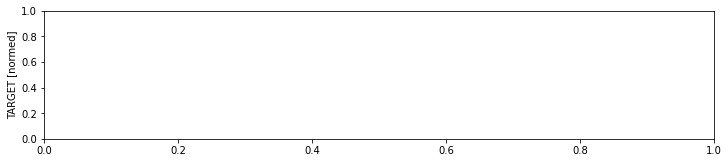

In [26]:
one_days_window_label_columns.plot()

In [35]:
import src.model.multiple_output.convolution
import importlib
importlib.reload(src.model.multiple_output.convolution)

from src.model.multiple_output.convolution import ConvolutionVariousSmall
from src.loaders.data_loader import load_test_features, load_basic_preprocessed_predict

ONE_DAY_STEPS=48
OUTPUT_STEPS=96

one_days_window_label_columns = WindowGenerator(
    train_df,
    valid_df,
    test_df,
    input_width=ONE_DAY_STEPS * 1,
    label_width=OUTPUT_STEPS,
    shift=OUTPUT_STEPS,
    label_columns=["TARGET"]
)
submission_df = load_submission_data()
_, predict_df = load_basic_preprocessed_predict()
predict_df["scaled_TARGET"] = predict_df["TARGET"]
predict_df = predict_df[cutter]
predict_df.drop("TARGET", axis=1, inplace=True)
predict_df = load_test_features(predict_df, 48 * 1)

evaluate_dict = {}

for i in range(1, 10):
    q = i/10
    print(q)
    
    conv_various_small = ConvolutionVariousSmall(48)

    compile_and_fit_with_pinball_loss(conv_various_small, one_days_window_label_columns, q)
    evaluate_dict[q] = conv_various_small.evaluate(one_days_window_label_columns.test, verbose=0)
    predict_np = predict_df.reshape(-1, 48, 7)
    pred_y = conv_various_small.predict(predict_np)[:, :, -1]
    submission_df[f"q_{q}"] = pred_y.reshape(-1)

s = 0
for index, value in evaluate_dict.items():
    s += value[0]
s / 10

to_submission_csv(submission_df, "conv_various_small_dhi_dni_ghi_standard_scaled_n_minmaxed.csv")

ratio should be 3 length list, example: [0.6, 0.3, 0.1]
sum of ration should be 1, example: [0.7, 0.2, 0.1]
shape of train, valid, test: (36792, 17), (10511, 17), (5257, 17)
0.1
Epoch 1/1000
1146/1146 [==============================] - 9s 7ms/step - loss: 1.6023 - mean_absolute_error: 15.1125 - mean_squared_error: 732.7265 - _pinball_loss: 1.6023 - val_loss: 1.7672 - val_mean_absolute_error: 14.7931 - val_mean_squared_error: 616.4991 - val__pinball_loss: 1.7672
Epoch 2/1000
1146/1146 [==============================] - 8s 7ms/step - loss: 1.3809 - mean_absolute_error: 11.6673 - mean_squared_error: 441.1002 - _pinball_loss: 1.3809 - val_loss: 1.7444 - val_mean_absolute_error: 14.6703 - val_mean_squared_error: 616.3423 - val__pinball_loss: 1.7444
Epoch 3/1000
1146/1146 [==============================] - 8s 7ms/step - loss: 1.3619 - mean_absolute_error: 11.4212 - mean_squared_error: 429.3500 - _pinball_loss: 1.3619 - val_loss: 1.7326 - val_mean_absolute_error: 14.5209 - val_mean_squared_er

Epoch 12/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 2.5874 - mean_absolute_error: 6.3188 - mean_squared_error: 149.1146 - _pinball_loss: 2.5874 - val_loss: 3.3513 - val_mean_absolute_error: 8.1831 - val_mean_squared_error: 223.3263 - val__pinball_loss: 3.3513
Epoch 13/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 2.5818 - mean_absolute_error: 6.3040 - mean_squared_error: 148.7036 - _pinball_loss: 2.5818 - val_loss: 3.3605 - val_mean_absolute_error: 8.3414 - val_mean_squared_error: 231.8278 - val__pinball_loss: 3.3605
Epoch 14/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 2.5783 - mean_absolute_error: 6.2947 - mean_squared_error: 148.5581 - _pinball_loss: 2.5783 - val_loss: 3.3548 - val_mean_absolute_error: 8.1970 - val_mean_squared_error: 224.8898 - val__pinball_loss: 3.3548
Epoch 15/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 2.5738 - mean_absolute_error: 6.2810 - mean_squared_error: 1

Epoch 17/1000
1146/1146 [==============================] - 8s 7ms/step - loss: 2.7112 - mean_absolute_error: 5.4679 - mean_squared_error: 124.6215 - _pinball_loss: 2.7112 - val_loss: 3.5425 - val_mean_absolute_error: 7.1028 - val_mean_squared_error: 190.1966 - val__pinball_loss: 3.5425
Epoch 18/1000
1146/1146 [==============================] - 7s 7ms/step - loss: 2.7044 - mean_absolute_error: 5.4539 - mean_squared_error: 124.3415 - _pinball_loss: 2.7044 - val_loss: 3.5264 - val_mean_absolute_error: 7.0949 - val_mean_squared_error: 188.5066 - val__pinball_loss: 3.5264
Epoch 19/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 2.7002 - mean_absolute_error: 5.4477 - mean_squared_error: 123.9800 - _pinball_loss: 2.7002 - val_loss: 3.5352 - val_mean_absolute_error: 7.1345 - val_mean_squared_error: 189.8179 - val__pinball_loss: 3.5352
Epoch 20/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 2.6953 - mean_absolute_error: 5.4337 - mean_squared_error: 1

Epoch 20/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 2.5989 - mean_absolute_error: 5.1979 - mean_squared_error: 129.6918 - _pinball_loss: 2.5989 - val_loss: 3.4184 - val_mean_absolute_error: 6.8368 - val_mean_squared_error: 197.4608 - val__pinball_loss: 3.4184
Epoch 21/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 2.5955 - mean_absolute_error: 5.1910 - mean_squared_error: 129.8981 - _pinball_loss: 2.5955 - val_loss: 3.4162 - val_mean_absolute_error: 6.8324 - val_mean_squared_error: 196.5246 - val__pinball_loss: 3.4162
Epoch 22/1000
1146/1146 [==============================] - 8s 7ms/step - loss: 2.5917 - mean_absolute_error: 5.1835 - mean_squared_error: 129.5972 - _pinball_loss: 2.5917 - val_loss: 3.4114 - val_mean_absolute_error: 6.8228 - val_mean_squared_error: 199.4383 - val__pinball_loss: 3.4114
Epoch 23/1000
1146/1146 [==============================] - 8s 7ms/step - loss: 2.5862 - mean_absolute_error: 5.1724 - mean_squared_error: 1

Epoch 14/1000
1146/1146 [==============================] - 8s 7ms/step - loss: 2.3975 - mean_absolute_error: 5.4474 - mean_squared_error: 152.7126 - _pinball_loss: 2.3975 - val_loss: 3.1071 - val_mean_absolute_error: 7.0181 - val_mean_squared_error: 225.0522 - val__pinball_loss: 3.1071
Epoch 15/1000
1146/1146 [==============================] - 8s 7ms/step - loss: 2.3904 - mean_absolute_error: 5.4322 - mean_squared_error: 152.5533 - _pinball_loss: 2.3904 - val_loss: 3.1082 - val_mean_absolute_error: 7.0968 - val_mean_squared_error: 231.7474 - val__pinball_loss: 3.1082
Epoch 16/1000
1146/1146 [==============================] - 8s 7ms/step - loss: 2.3819 - mean_absolute_error: 5.4178 - mean_squared_error: 152.2418 - _pinball_loss: 2.3819 - val_loss: 3.0978 - val_mean_absolute_error: 7.0306 - val_mean_squared_error: 227.1934 - val__pinball_loss: 3.0978
Epoch 17/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 2.3759 - mean_absolute_error: 5.4063 - mean_squared_error: 1

1146/1146 [==============================] - 7s 6ms/step - loss: 1.9413 - mean_absolute_error: 5.6804 - mean_squared_error: 174.6374 - _pinball_loss: 1.9413 - val_loss: 2.5377 - val_mean_absolute_error: 7.2625 - val_mean_squared_error: 252.6837 - val__pinball_loss: 2.5377
Epoch 26/1000
1146/1146 [==============================] - 8s 7ms/step - loss: 1.9382 - mean_absolute_error: 5.6745 - mean_squared_error: 174.5023 - _pinball_loss: 1.9382 - val_loss: 2.5537 - val_mean_absolute_error: 7.2185 - val_mean_squared_error: 251.0840 - val__pinball_loss: 2.5537
Epoch 27/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 1.9373 - mean_absolute_error: 5.6685 - mean_squared_error: 174.2674 - _pinball_loss: 1.9373 - val_loss: 2.5400 - val_mean_absolute_error: 7.2849 - val_mean_squared_error: 256.4890 - val__pinball_loss: 2.5400
Epoch 28/1000
1146/1146 [==============================] - 8s 7ms/step - loss: 1.9288 - mean_absolute_error: 5.6564 - mean_squared_error: 174.4404 - _pin

1146/1146 [==============================] - 7s 6ms/step - loss: 1.4779 - mean_absolute_error: 6.3625 - mean_squared_error: 204.8177 - _pinball_loss: 1.4779 - val_loss: 1.8842 - val_mean_absolute_error: 8.1041 - val_mean_squared_error: 301.1913 - val__pinball_loss: 1.8842
Epoch 16/1000
1146/1146 [==============================] - 8s 7ms/step - loss: 1.4692 - mean_absolute_error: 6.3337 - mean_squared_error: 204.3457 - _pinball_loss: 1.4692 - val_loss: 1.8734 - val_mean_absolute_error: 7.9400 - val_mean_squared_error: 294.0505 - val__pinball_loss: 1.8734
Epoch 17/1000
1146/1146 [==============================] - 9s 8ms/step - loss: 1.4665 - mean_absolute_error: 6.3275 - mean_squared_error: 204.5786 - _pinball_loss: 1.4665 - val_loss: 1.8866 - val_mean_absolute_error: 8.1164 - val_mean_squared_error: 302.0226 - val__pinball_loss: 1.8866
Epoch 18/1000
1146/1146 [==============================] - 8s 7ms/step - loss: 1.4607 - mean_absolute_error: 6.3144 - mean_squared_error: 204.5994 - _pin

Epoch 44/1000
1146/1146 [==============================] - 8s 7ms/step - loss: 1.3864 - mean_absolute_error: 6.0928 - mean_squared_error: 201.2193 - _pinball_loss: 1.3864 - val_loss: 1.8303 - val_mean_absolute_error: 7.9188 - val_mean_squared_error: 298.1212 - val__pinball_loss: 1.8303
Epoch 45/1000
1146/1146 [==============================] - 7s 7ms/step - loss: 1.3848 - mean_absolute_error: 6.0971 - mean_squared_error: 201.7798 - _pinball_loss: 1.3848 - val_loss: 1.8328 - val_mean_absolute_error: 7.7192 - val_mean_squared_error: 290.0334 - val__pinball_loss: 1.8328
Epoch 46/1000
1146/1146 [==============================] - 8s 7ms/step - loss: 1.3839 - mean_absolute_error: 6.0812 - mean_squared_error: 200.8480 - _pinball_loss: 1.3839 - val_loss: 1.8265 - val_mean_absolute_error: 7.7721 - val_mean_squared_error: 292.0384 - val__pinball_loss: 1.8265
Epoch 47/1000
1146/1146 [==============================] - 8s 7ms/step - loss: 1.3798 - mean_absolute_error: 6.0740 - mean_squared_error: 2

Epoch 22/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 0.8338 - mean_absolute_error: 7.2680 - mean_squared_error: 239.4068 - _pinball_loss: 0.8338 - val_loss: 1.0733 - val_mean_absolute_error: 8.8934 - val_mean_squared_error: 337.8684 - val__pinball_loss: 1.0733
Epoch 23/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 0.8310 - mean_absolute_error: 7.2548 - mean_squared_error: 239.4357 - _pinball_loss: 0.8310 - val_loss: 1.0827 - val_mean_absolute_error: 8.8434 - val_mean_squared_error: 332.2170 - val__pinball_loss: 1.0827
Epoch 24/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 0.8293 - mean_absolute_error: 7.2448 - mean_squared_error: 239.1191 - _pinball_loss: 0.8293 - val_loss: 1.0728 - val_mean_absolute_error: 8.7734 - val_mean_squared_error: 331.5699 - val__pinball_loss: 1.0728
Epoch 25/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 0.8274 - mean_absolute_error: 7.2356 - mean_squared_error: 2

In [38]:
s = 0
for index, value in evaluate_dict.items():
    s += value[0]
s / 10

submission_df.to_csv('conv_various_small_using_dhi_dni_ghi_standard_scaled_n_minmaxed.csv', index=False)

In [51]:
import src.model.multiple_output.convolution
import src.trainers
import importlib
importlib.reload(src.model.multiple_output.convolution)
importlib.reload(src.trainers)

from src.model.multiple_output.convolution import ConvolutionVariousSmallReturnOnce
from src.loaders.data_loader import load_test_features, load_basic_preprocessed_predict
from src.trainers import compile_and_fit_with_pinball_loss_once

ONE_DAY_STEPS=48
OUTPUT_STEPS=96

one_days_window_label_columns = WindowGenerator(
    train_df,
    valid_df,
    test_df,
    input_width=ONE_DAY_STEPS * 1,
    label_width=OUTPUT_STEPS,
    shift=OUTPUT_STEPS,
    label_columns=["TARGET"]
)
submission_df = load_submission_data()
_, predict_df = load_basic_preprocessed_predict()
predict_df["scaled_TARGET"] = predict_df["TARGET"]
predict_df = predict_df[cutter]
predict_df.drop("TARGET", axis=1, inplace=True)
predict_df = load_test_features(predict_df, 48 * 1)

evaluate_dict = {}

    
conv_various_small_return_once = ConvolutionVariousSmallReturnOnce(48)

compile_and_fit_with_pinball_loss_once(conv_various_small_return_once, one_days_window_label_columns)
predict_np = predict_df.reshape(-1, 48, 7)
pred_y = conv_various_small_return_once.predict(predict_np)[:, :, -1]


to_submission_csv(submission_df, "conv_various_small_return_once_dhi_dni_ghi_standard_scaled_n_minmaxed.csv")

ratio should be 3 length list, example: [0.6, 0.3, 0.1]
sum of ration should be 1, example: [0.7, 0.2, 0.1]
shape of train, valid, test: (36792, 17), (10511, 17), (5257, 17)
Epoch 1/1000
1146/1146 [==============================] - 13s 11ms/step - loss: 1.7452 - mean_absolute_error: 17.4503 - mean_squared_error: 952.7478 - val_loss: 2.1811 - val_mean_absolute_error: 21.8107 - val_mean_squared_error: 1310.7931
Epoch 2/1000
1146/1146 [==============================] - 12s 10ms/step - loss: 1.7446 - mean_absolute_error: 17.4460 - mean_squared_error: 952.5681 - val_loss: 2.1811 - val_mean_absolute_error: 21.8107 - val_mean_squared_error: 1310.7924
Epoch 3/1000
1146/1146 [==============================] - 11s 10ms/step - loss: 1.7446 - mean_absolute_error: 17.4463 - mean_squared_error: 952.4923 - val_loss: 2.1811 - val_mean_absolute_error: 21.8107 - val_mean_squared_error: 1310.7914
Epoch 4/1000
1146/1146 [==============================] - 11s 10ms/step - loss: 1.7449 - mean_absolute_error:

In [58]:
predict_np = predict_df.reshape(-1, 48, 7)
pred_y = conv_various_small_return_once.predict(predict_np)
pred_y.shape

(81, 96, 9)

In [ ]:
submission_df.to_csv('conv_various_small_return_once_using_dhi_dni_ghi_standard_scaled_n_minmaxed.csv', index=False)

In [31]:
import pandas as pd

submission_df = pd.read_csv('data/submission_history/conv_various_2_using_dhi_dni_ghi_standard_scaled_n_minmaxed.csv')
submission_df

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,-0.012439,-0.011767,-0.073527,-0.029060,0.033504,0.224904,-0.143813,0.014173,0.405526
1,0.csv_Day7_0h30m,0.006988,-0.063830,0.038834,-0.032453,0.041972,0.141368,-0.001862,-0.017666,0.317269
2,0.csv_Day7_1h00m,-0.006193,-0.056022,-0.039268,-0.032808,0.122649,0.190037,-0.072631,0.082722,0.417650
3,0.csv_Day7_1h30m,-0.046119,-0.167568,-0.084419,0.111410,-0.012235,0.118749,-0.028045,0.034287,0.357527
4,0.csv_Day7_2h00m,0.013862,-0.053064,-0.006279,0.300753,-0.112016,0.138389,0.208718,0.022814,0.835670
...,...,...,...,...,...,...,...,...,...,...
7771,80.csv_Day8_21h30m,-0.046949,-0.060607,-0.158245,-0.130741,-0.269549,0.137537,-0.171087,0.378671,0.306352
7772,80.csv_Day8_22h00m,-0.004267,-0.047090,-0.069049,-0.033668,-0.019169,0.066999,-0.285276,0.398138,0.050684
7773,80.csv_Day8_22h30m,-0.063624,-0.012024,-0.023656,0.049942,0.100720,-0.021225,-0.084797,0.152913,0.237711
7774,80.csv_Day8_23h00m,-0.005158,-0.051610,-0.072732,0.168911,-0.078392,0.033603,0.093835,-0.077666,0.315724


In [32]:
for i in range(1, 10):
    q = i/10
    submission_df[f"q_{q}"][submission_df[f"q_{q}"] < 1] = 0
submission_df

C:\Users\bees1\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bees1\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bees1\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.csv_Day7_0h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.csv_Day7_1h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.csv_Day7_1h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.csv_Day7_2h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7771,80.csv_Day8_21h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7772,80.csv_Day8_22h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,80.csv_Day8_22h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7774,80.csv_Day8_23h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
submission_df.to_csv('conv_various_2_using_dhi_dni_ghi_standard_scaled_n_minmaxed_smaller_than_1_zero.csv', index=False)